In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [104]:
stasiun1 = pd.read_csv('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Code\\EDA\\stasiun_1_intrp.csv')

In [105]:
stasiun1

,Unnamed: 0,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0
...,...,...,...,...,...,...,...
1822,2020-12-27,29.0,74.0,0.000000,5.7,240.0,2.0
1823,2020-12-28,28.1,77.0,0.050000,6.8,240.0,3.0
1824,2020-12-29,27.1,82.0,0.100000,6.1,240.0,3.0
1825,2020-12-30,27.0,81.0,0.300000,1.4,260.0,2.0


In [106]:
stasiun1.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
stasiun1['date'] = pd.to_datetime(stasiun1['date'])

In [107]:
def get_model(data, column):
    df_train = data[['date', column]]
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    my_model = Prophet()
    my_model.fit(df_train)
    
    return my_model

### Create Rainfall Prediction Model

In [108]:
model_RR = get_model(stasiun1, 'RR')

C:\Users\thebl\AppData\Local\Temp\ipykernel_29468\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
15:23:45 - cmdstanpy - INFO - Chain [1] start processing
15:23:45 - cmdstanpy - INFO - Chain [1] done processing


In [109]:
future_dates = model_RR.make_future_dataframe(periods=365, freq='D')
future_dates.shape[0]

2192

In [110]:
forecast = model_RR.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,14.496083,-3.072668,33.588272
1,2016-01-02,15.144074,-3.466876,33.815714
2,2016-01-03,15.348915,-1.300738,35.464947
3,2016-01-04,14.973873,-3.594679,33.291269
4,2016-01-05,16.086439,-1.801800,34.306044


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


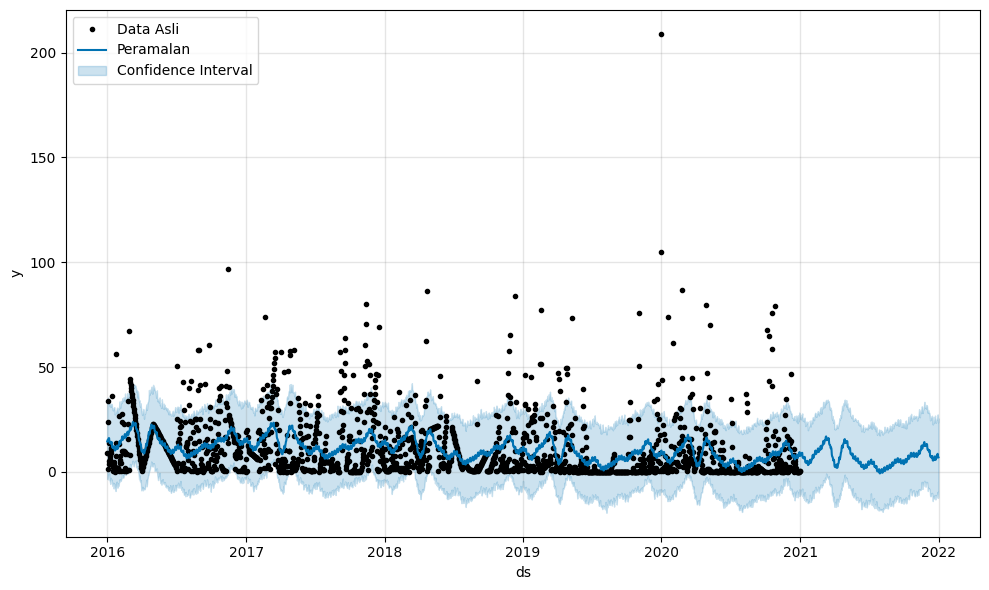

In [111]:
model_RR.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [112]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [113]:
triple_metric(forecast, 'RR')

Mean Absolute Error :  8.65906838818018
Mean Squared Error :  201.70223585170652
Mean Absolute Percentage Error :  1.5936622014210415


In [114]:
predict_res_rr = forecast['yhat'][len(forecast)-720:-355]

### Create Sunshine Duration Prediction Model

In [115]:
model_ss = get_model(stasiun1, 'ss')

C:\Users\thebl\AppData\Local\Temp\ipykernel_29468\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
15:23:45 - cmdstanpy - INFO - Chain [1] start processing
15:23:45 - cmdstanpy - INFO - Chain [1] done processing


In [116]:
future_dates = model_ss.make_future_dataframe(periods=365, freq='D')
forecast = model_ss.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


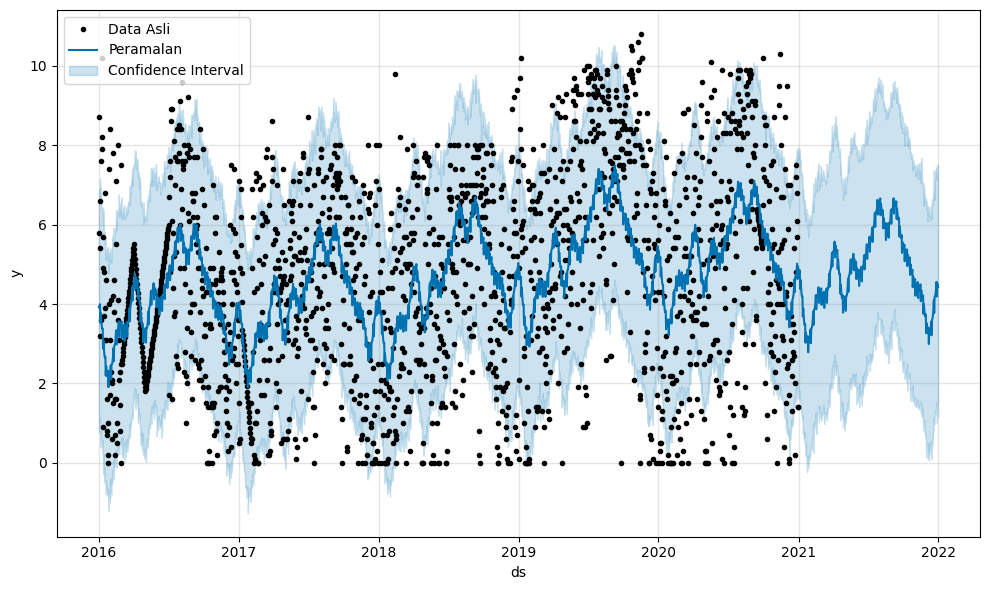

In [117]:
model_ss.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [118]:
triple_metric(forecast, 'ss')

Mean Absolute Error :  2.251154041617564
Mean Squared Error :  7.341145410100989
Mean Absolute Percentage Error :  0.4463960956618233


In [119]:
predict_res_ss = forecast['yhat'][len(forecast)-720:-355]

### Create Average Wind Direction Predict Model

In [120]:
model_ddd = get_model(stasiun1, 'ddd_x')

C:\Users\thebl\AppData\Local\Temp\ipykernel_29468\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
15:23:46 - cmdstanpy - INFO - Chain [1] start processing
15:23:46 - cmdstanpy - INFO - Chain [1] done processing


In [121]:
future_dates = model_ddd.make_future_dataframe(periods=365, freq='D')
forecast = model_ddd.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


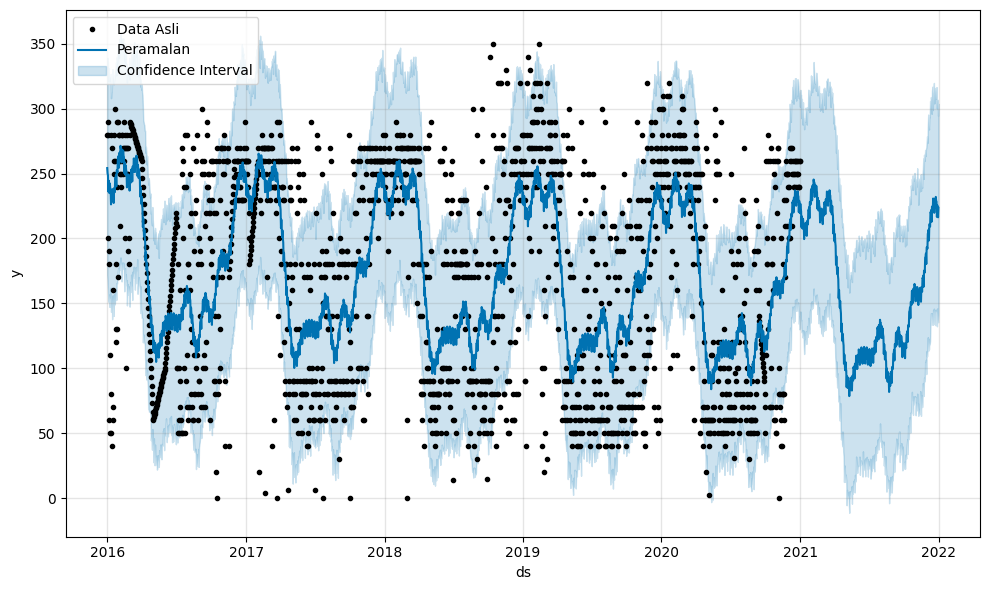

In [122]:
model_ddd.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [123]:
triple_metric(forecast, 'ddd_x')

Mean Absolute Error :  53.08291616163778
Mean Squared Error :  4340.307408843931
Mean Absolute Percentage Error :  0.3707663071180354


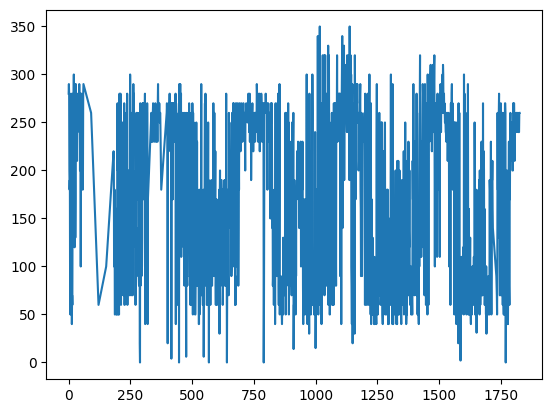

In [124]:
plt.plot(stasiun1['ddd_x'])

In [125]:
df_copy = stasiun1.copy()
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,280.0,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,290.0,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,280.0,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,200.0,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,180.0,1.0


In [126]:
# Change the measure into radiant
df_copy['ddd_x'] = df_copy['ddd_x'].apply(lambda x: x * np.pi / 180)
df_copy.head()

,date,Tavg,RH_avg,RR,ss,ddd_x,ff_avg
0,2016-01-01,28.6,81.0,9.239964,5.8,4.886922,2.0
1,2016-01-02,27.0,88.0,1.600000,8.7,5.061455,2.0
2,2016-01-03,28.1,80.0,33.800000,5.4,4.886922,2.0
3,2016-01-04,29.2,81.0,23.800000,6.6,3.490659,1.0
4,2016-01-05,26.7,91.0,13.800000,3.2,3.141593,1.0


Text(0.5, 1.0, 'ddd_x after convert into radiant')

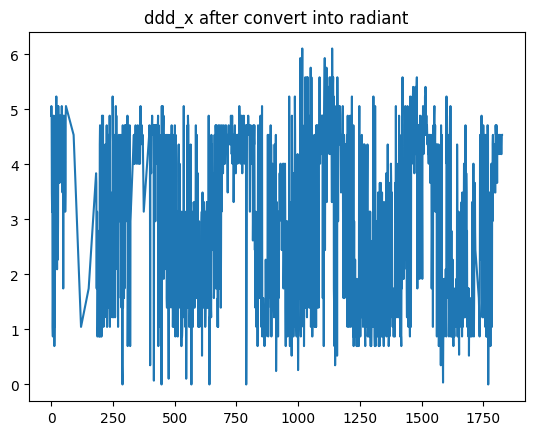

In [127]:
plt.plot(df_copy['ddd_x'])
plt.title('ddd_x after convert into radiant')

In [128]:
model_ddd_2 = get_model(df_copy, 'ddd_x')

C:\Users\thebl\AppData\Local\Temp\ipykernel_29468\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
15:23:48 - cmdstanpy - INFO - Chain [1] start processing
15:23:48 - cmdstanpy - INFO - Chain [1] done processing


In [129]:
future_dates = model_ddd_2.make_future_dataframe(periods=365, freq='D')
forecast = model_ddd_2.predict(future_dates)

c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


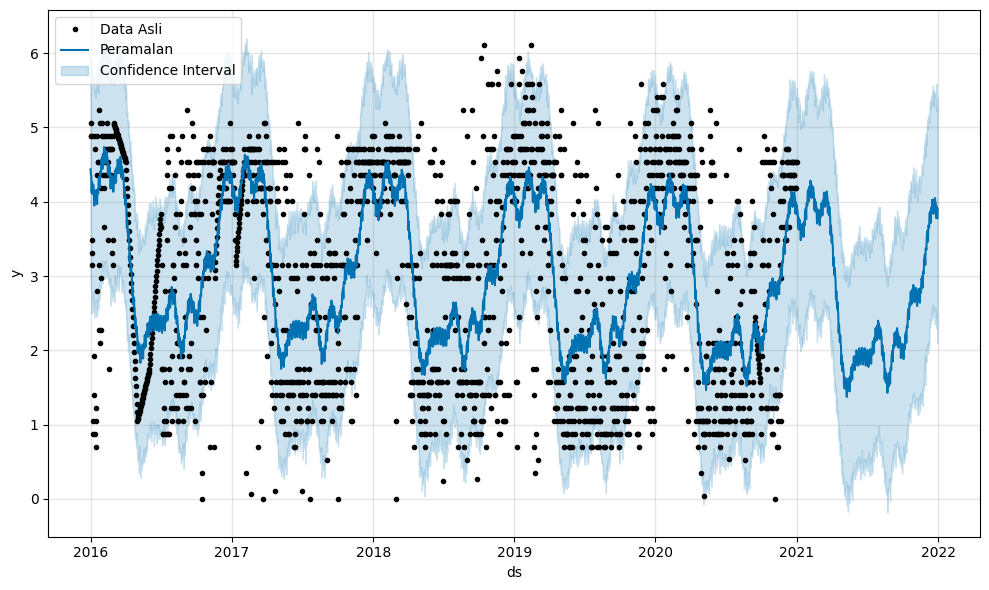

In [130]:
model_ddd_2.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [131]:
mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Error : ',mae)
mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Squared Error : ',mse)
mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], df_copy['ddd_x'][len(df_copy)-365:])
print('Mean Absolute Percentage Error : ',mape)

Mean Absolute Error :  0.9264544083015103
Mean Squared Error :  1.3220923068163482
Mean Absolute Percentage Error :  0.37073456776048813


In [132]:
predict_res_ddd = forecast['yhat'][len(forecast)-720:-355]

### Create Humidity Prediction Model

C:\Users\thebl\AppData\Local\Temp\ipykernel_29468\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
15:23:48 - cmdstanpy - INFO - Chain [1] start processing


15:23:49 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


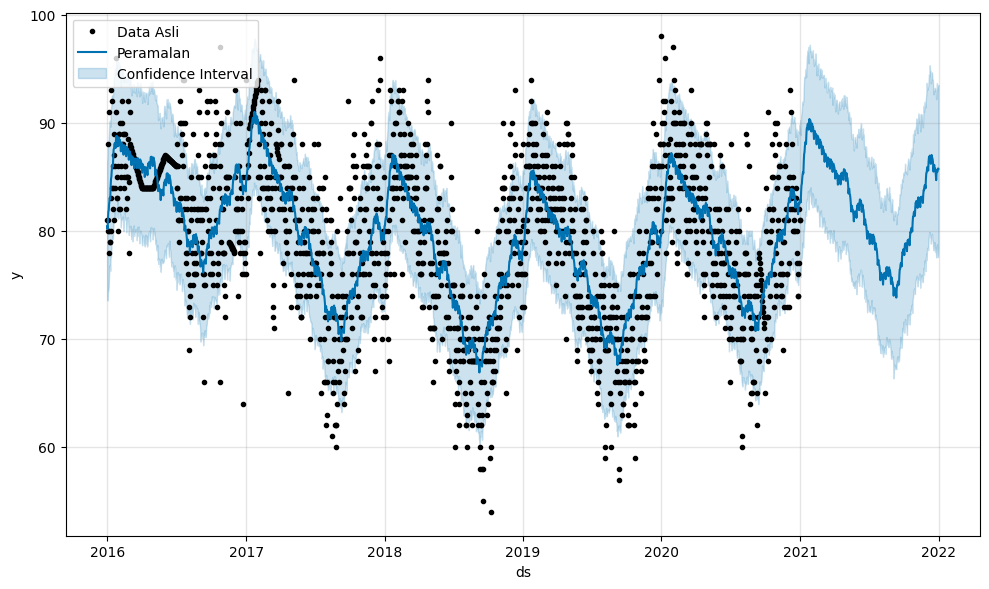

In [133]:
model_RH = get_model(stasiun1, 'RH_avg')
future_dates = model_RH.make_future_dataframe(periods=365, freq='D')
forecast = model_RH.predict(future_dates)

model_RH.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [134]:
triple_metric(forecast, 'RH_avg')

Mean Absolute Error :  4.138728364305093
Mean Squared Error :  26.779884571568633
Mean Absolute Percentage Error :  0.05219402040077517


In [135]:
predict_res_rh = forecast['yhat'][len(forecast)-720:-355]

### Creating Wind Speed Average Prediction Model

C:\Users\thebl\AppData\Local\Temp\ipykernel_29468\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
15:23:49 - cmdstanpy - INFO - Chain [1] start processing


15:23:49 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


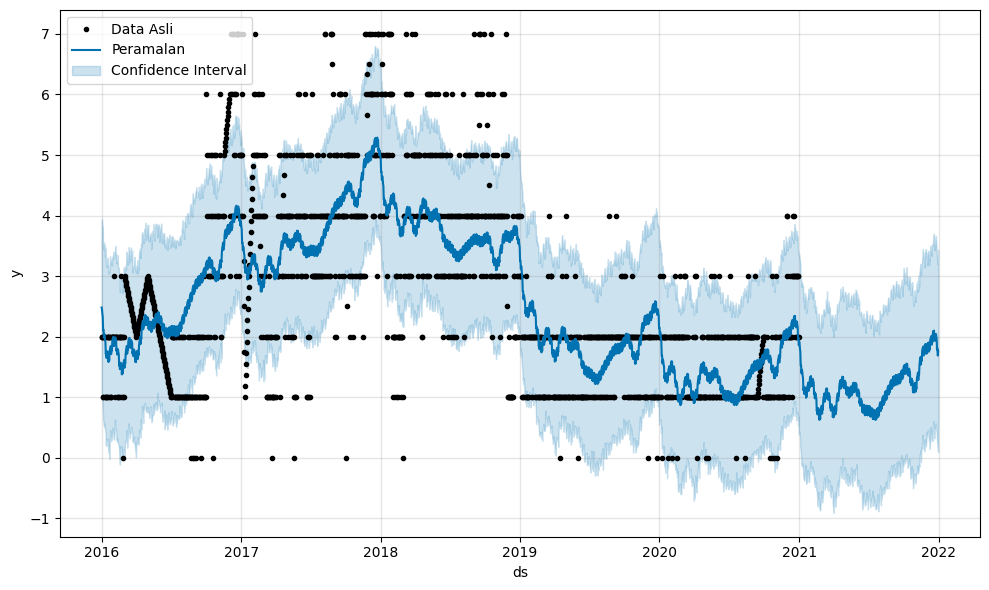

In [136]:
model_ff = get_model(stasiun1, 'ff_avg')
future_dates = model_ff.make_future_dataframe(periods=365, freq='D')
forecast = model_ff.predict(future_dates)

model_ff.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [137]:
triple_metric(forecast, 'ff_avg')

Mean Absolute Error :  0.6127728982599657
Mean Squared Error :  0.5828328319455339
Mean Absolute Percentage Error :  0.44873515368045286


In [138]:
predict_res_ff = forecast['yhat'][len(forecast)-720:-355]

### Create Average Temperature Prediction Model

C:\Users\thebl\AppData\Local\Temp\ipykernel_29468\1345731877.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
15:23:50 - cmdstanpy - INFO - Chain [1] start processing


15:23:50 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


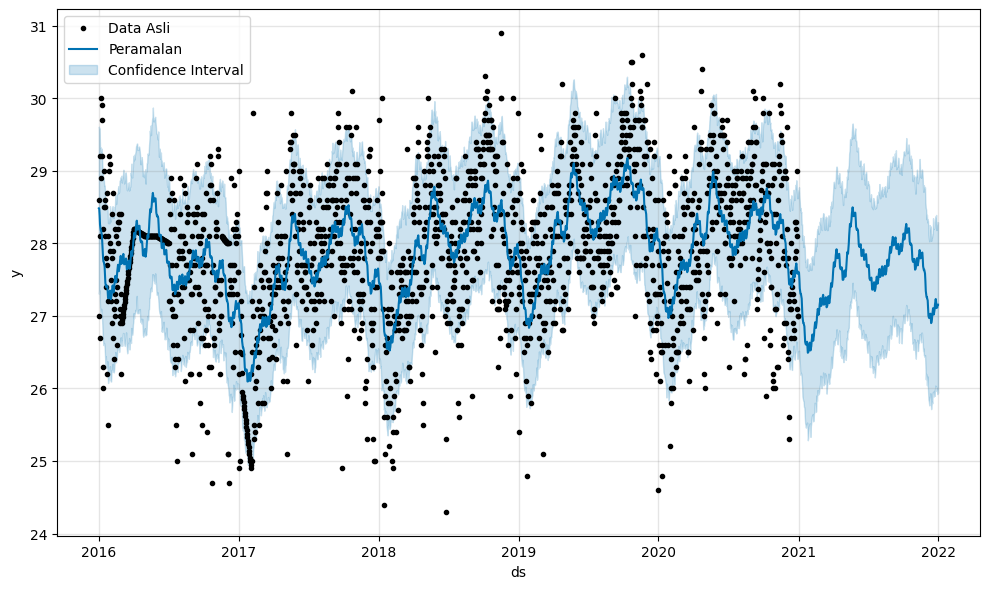

In [139]:
model_T = get_model(stasiun1, 'Tavg')
future_dates = model_T.make_future_dataframe(periods=365, freq='D')
forecast = model_T.predict(future_dates)

model_T.plot(forecast, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [140]:
triple_metric(forecast, 'Tavg')

Mean Absolute Error :  0.7665723751731668
Mean Squared Error :  0.908312352587604
Mean Absolute Percentage Error :  0.02737373627157782


In [141]:
predict_res_t = forecast['yhat'][len(forecast)-720:-355]

### Classification Time !!

In [142]:
import pickle

# Buka file pickle
with open('C:\\Users\\thebl\\Downloads\\Clone\\Intern-BCC-2024\\Code\\models\\Classification + Time Series\\best_classify.pkl', 'rb') as f:
    rf_model = pickle.load(f)

In [143]:
predict_res_rr = predict_res_rr.to_frame(name='RR')
predict_res_t = predict_res_t.to_frame(name='Tavg')
predict_res_rh = predict_res_rh.to_frame(name='RH_avg')
predict_res_ss = predict_res_ss.to_frame(name='ss')
predict_res_ff = predict_res_ff.to_frame(name='ff_avg')
predict_res_ddd = predict_res_ddd.to_frame(name='ddd_x')

In [144]:
predict_res_rr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 1472 to 1836
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RR      365 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [145]:
pred_res_2020 = pd.concat([predict_res_t, predict_res_rh, predict_res_ss, predict_res_ddd, predict_res_ff, predict_res_rr], axis=1)

In [146]:
pred_res_2020['region_name_Jakarta Selatan'] = 1
pred_res_2020['region_name_Jakarta Timur'] = 0
pred_res_2020['region_name_Jakarta Utara'] = 0

In [147]:
def convert_radian_to_degree(radian):
    return radian * (180 / np.pi)

pred_res_2020['ddd_x'] = pred_res_2020['ddd_x'].apply(convert_radian_to_degree)

In [148]:
pred_res_2020

,Tavg,RH_avg,ss,ddd_x,ff_avg,RR,region_name_Jakarta Selatan,region_name_Jakarta Timur,region_name_Jakarta Utara
1472,27.541450,83.789862,4.476094,215.394743,1.534712,7.163284,1,0,0
1473,27.404223,84.481873,4.481403,204.248915,1.506248,6.510112,1,0,0
1474,27.359641,84.656791,3.972455,214.266899,1.310517,7.392941,1,0,0
1475,27.322326,85.171795,4.181301,212.062296,1.354631,7.234228,1,0,0
1476,27.326277,85.436770,4.026902,208.555453,1.265039,5.028084,1,0,0
...,...,...,...,...,...,...,...,...,...
1832,27.304430,84.903598,4.610555,213.060017,1.526397,9.071581,1,0,0
1833,27.303008,85.234364,4.467709,207.617448,1.393903,6.946897,1,0,0
1834,27.268485,85.427483,4.334613,215.206690,1.454732,6.675890,1,0,0
1835,27.238613,85.325428,4.229278,211.615166,1.424339,7.004164,1,0,0


<Axes: >

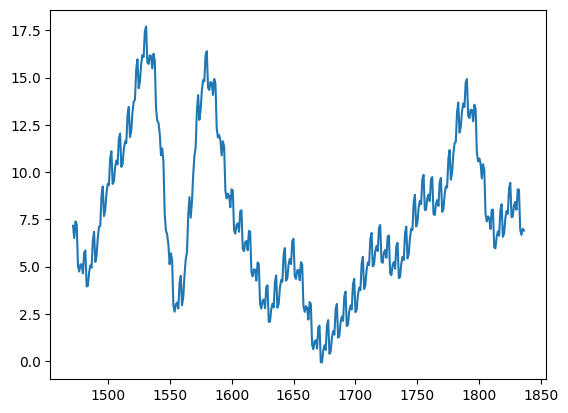

In [149]:
pred_res_2020['RR'].plot()

In [150]:
pred_res_2020

,Tavg,RH_avg,ss,ddd_x,ff_avg,RR,region_name_Jakarta Selatan,region_name_Jakarta Timur,region_name_Jakarta Utara
1472,27.541450,83.789862,4.476094,215.394743,1.534712,7.163284,1,0,0
1473,27.404223,84.481873,4.481403,204.248915,1.506248,6.510112,1,0,0
1474,27.359641,84.656791,3.972455,214.266899,1.310517,7.392941,1,0,0
1475,27.322326,85.171795,4.181301,212.062296,1.354631,7.234228,1,0,0
1476,27.326277,85.436770,4.026902,208.555453,1.265039,5.028084,1,0,0
...,...,...,...,...,...,...,...,...,...
1832,27.304430,84.903598,4.610555,213.060017,1.526397,9.071581,1,0,0
1833,27.303008,85.234364,4.467709,207.617448,1.393903,6.946897,1,0,0
1834,27.268485,85.427483,4.334613,215.206690,1.454732,6.675890,1,0,0
1835,27.238613,85.325428,4.229278,211.615166,1.424339,7.004164,1,0,0


In [151]:
flood_predict = rf_model.predict(pred_res_2020)

In [152]:
flood_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [153]:
sum = np.sum(flood_predict == 1)

In [154]:
sum

32

HyperParameter Tuning Prophet for RR

Kita menggunakan metode ParameterGrid yaitu dengan mecoba setiap kombinasi dari parameter yang telah ditentunkan. Lalu kita  lakukan memperhitungkan MAE

In [155]:
import random
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error

# Daftar jenis tren pertumbuhan yang ingin dicoba
growth_types = ['linear','logistic']

params_grid = {
    'seasonality_mode': ['multiplicative', 'additive'],
    'changepoint_prior_scale': [0.1, 0.2, 0.3, 0.4, 0.5],
    'n_changepoints': [100, 150, 200],
    'growth': growth_types  # Menambahkan jenis tren pertumbuhan ke dalam grid parameter
}

grid = ParameterGrid(params_grid)

# Inisialisasi nilai MAE terbaik dengan nilai tak terhingga
best_mae = float('inf')  
best_parameters = None

for p in grid:
    print("Testing parameters:", p)
    random.seed(0)
    
    future = stasiun1[['date', 'RR']].copy()
    future.columns = ['ds', 'y']

    if p['growth'] == 'logistic':
        future['cap'] = 200  # Menambahkan kolom 'cap' dengan nilai 200
        
    train_model = Prophet(
        changepoint_prior_scale=p['changepoint_prior_scale'],
        n_changepoints=p['n_changepoints'],
        seasonality_mode=p['seasonality_mode'],
        weekly_seasonality=True,
        daily_seasonality=True,
        yearly_seasonality=True,
        interval_width=0.95,
        growth=p['growth']  # Menggunakan jenis tren pertumbuhan dari grid parameter
    )
    
    train_model.fit(future)
    
    future_forecast = train_model.make_future_dataframe(periods=365)
    
    if p['growth'] == 'logistic':
        future_forecast['cap'] = 200  # Menambahkan kolom 'cap' dengan nilai 200 pada future_forecast
        
    forecast = train_model.predict(future_forecast)
    
    # Menghitung MAE
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun1['RR'][len(stasiun1)-365:])
    
    if mae < best_mae:
        best_mae = mae
        best_parameters = p

print("Best Parameters:", best_parameters)
print("Best MAE:", best_mae)


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


15:23:51 - cmdstanpy - INFO - Chain [1] start processing
15:23:51 - cmdstanpy - INFO - Chain [1] done processing
15:23:52 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'n_changepoints': 100, 'seasonality_mode': 'additive'}


15:23:52 - cmdstanpy - INFO - Chain [1] done processing


15:23:52 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


15:23:53 - cmdstanpy - INFO - Chain [1] done processing
15:23:53 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'n_changepoints': 150, 'seasonality_mode': 'additive'}


15:23:53 - cmdstanpy - INFO - Chain [1] done processing
15:23:54 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


15:23:54 - cmdstanpy - INFO - Chain [1] done processing
15:23:54 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'linear', 'n_changepoints': 200, 'seasonality_mode': 'additive'}


15:23:54 - cmdstanpy - INFO - Chain [1] done processing
15:23:55 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


15:23:55 - cmdstanpy - INFO - Chain [1] done processing
15:23:58 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'n_changepoints': 100, 'seasonality_mode': 'additive'}


15:23:58 - cmdstanpy - INFO - Chain [1] done processing
15:24:01 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


15:24:01 - cmdstanpy - INFO - Chain [1] done processing
15:24:04 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'additive'}


15:24:04 - cmdstanpy - INFO - Chain [1] done processing
15:24:06 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


15:24:06 - cmdstanpy - INFO - Chain [1] done processing
15:24:09 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'additive'}


15:24:09 - cmdstanpy - INFO - Chain [1] done processing
15:24:12 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'linear', 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


15:24:15 - cmdstanpy - INFO - Chain [1] done processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'linear', 'n_changepoints': 100, 'seasonality_mode': 'additive'}


15:24:16 - cmdstanpy - INFO - Chain [1] start processing
15:24:16 - cmdstanpy - INFO - Chain [1] done processing
15:24:16 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'linear', 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


15:24:20 - cmdstanpy - INFO - Chain [1] done processing
15:24:20 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'linear', 'n_changepoints': 150, 'seasonality_mode': 'additive'}


15:24:21 - cmdstanpy - INFO - Chain [1] done processing
15:24:21 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'linear', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


15:24:25 - cmdstanpy - INFO - Chain [1] done processing
15:24:25 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'linear', 'n_changepoints': 200, 'seasonality_mode': 'additive'}


15:24:26 - cmdstanpy - INFO - Chain [1] done processing
15:24:26 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'logistic', 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


15:24:26 - cmdstanpy - INFO - Chain [1] done processing
15:24:29 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'logistic', 'n_changepoints': 100, 'seasonality_mode': 'additive'}


15:24:29 - cmdstanpy - INFO - Chain [1] done processing
15:24:32 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


15:24:33 - cmdstanpy - INFO - Chain [1] done processing
15:24:35 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'additive'}


15:24:36 - cmdstanpy - INFO - Chain [1] done processing
15:24:39 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


15:24:39 - cmdstanpy - INFO - Chain [1] done processing
15:24:42 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.2, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'additive'}


15:24:42 - cmdstanpy - INFO - Chain [1] done processing
15:24:45 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'linear', 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


15:24:48 - cmdstanpy - INFO - Chain [1] done processing
15:24:49 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'linear', 'n_changepoints': 100, 'seasonality_mode': 'additive'}


15:24:49 - cmdstanpy - INFO - Chain [1] done processing
15:24:49 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'linear', 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


15:24:53 - cmdstanpy - INFO - Chain [1] done processing
15:24:53 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'linear', 'n_changepoints': 150, 'seasonality_mode': 'additive'}


15:24:54 - cmdstanpy - INFO - Chain [1] done processing
15:24:54 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'linear', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


15:24:58 - cmdstanpy - INFO - Chain [1] done processing
15:24:58 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'linear', 'n_changepoints': 200, 'seasonality_mode': 'additive'}


15:24:59 - cmdstanpy - INFO - Chain [1] done processing
15:24:59 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'logistic', 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


15:25:00 - cmdstanpy - INFO - Chain [1] done processing
15:25:03 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'logistic', 'n_changepoints': 100, 'seasonality_mode': 'additive'}


15:25:03 - cmdstanpy - INFO - Chain [1] done processing
15:25:06 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


15:25:06 - cmdstanpy - INFO - Chain [1] done processing
15:25:09 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'additive'}


15:25:09 - cmdstanpy - INFO - Chain [1] done processing
15:25:12 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


15:25:12 - cmdstanpy - INFO - Chain [1] done processing
15:25:16 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.3, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'additive'}


15:25:16 - cmdstanpy - INFO - Chain [1] done processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'linear', 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


15:25:20 - cmdstanpy - INFO - Chain [1] start processing
15:25:22 - cmdstanpy - INFO - Chain [1] done processing
15:25:23 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'linear', 'n_changepoints': 100, 'seasonality_mode': 'additive'}


15:25:23 - cmdstanpy - INFO - Chain [1] done processing
15:25:24 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'linear', 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


15:25:27 - cmdstanpy - INFO - Chain [1] done processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'linear', 'n_changepoints': 150, 'seasonality_mode': 'additive'}


15:25:27 - cmdstanpy - INFO - Chain [1] start processing
15:25:28 - cmdstanpy - INFO - Chain [1] done processing
15:25:28 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'linear', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


15:25:32 - cmdstanpy - INFO - Chain [1] done processing
15:25:32 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'linear', 'n_changepoints': 200, 'seasonality_mode': 'additive'}


15:25:33 - cmdstanpy - INFO - Chain [1] done processing
15:25:33 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'logistic', 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


15:25:34 - cmdstanpy - INFO - Chain [1] done processing
15:25:37 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'logistic', 'n_changepoints': 100, 'seasonality_mode': 'additive'}


15:25:38 - cmdstanpy - INFO - Chain [1] done processing
15:25:41 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


15:25:41 - cmdstanpy - INFO - Chain [1] done processing
15:25:44 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'additive'}


15:25:45 - cmdstanpy - INFO - Chain [1] done processing
15:25:48 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


15:25:48 - cmdstanpy - INFO - Chain [1] done processing
15:25:51 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.4, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'additive'}


15:25:52 - cmdstanpy - INFO - Chain [1] done processing
15:25:55 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


15:25:56 - cmdstanpy - INFO - Chain [1] done processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'n_changepoints': 100, 'seasonality_mode': 'additive'}


15:25:56 - cmdstanpy - INFO - Chain [1] start processing
15:25:57 - cmdstanpy - INFO - Chain [1] done processing
15:25:57 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


15:26:00 - cmdstanpy - INFO - Chain [1] done processing
15:26:00 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'n_changepoints': 150, 'seasonality_mode': 'additive'}


15:26:01 - cmdstanpy - INFO - Chain [1] done processing
15:26:01 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


15:26:05 - cmdstanpy - INFO - Chain [1] done processing
15:26:05 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'linear', 'n_changepoints': 200, 'seasonality_mode': 'additive'}


15:26:06 - cmdstanpy - INFO - Chain [1] done processing
15:26:07 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


15:26:07 - cmdstanpy - INFO - Chain [1] done processing
15:26:10 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'n_changepoints': 100, 'seasonality_mode': 'additive'}


15:26:10 - cmdstanpy - INFO - Chain [1] done processing
15:26:13 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


15:26:14 - cmdstanpy - INFO - Chain [1] done processing
15:26:16 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'additive'}


15:26:17 - cmdstanpy - INFO - Chain [1] done processing
15:26:20 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


15:26:21 - cmdstanpy - INFO - Chain [1] done processing
15:26:24 - cmdstanpy - INFO - Chain [1] start processing


Testing parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'additive'}


15:26:24 - cmdstanpy - INFO - Chain [1] done processing


Best Parameters: {'changepoint_prior_scale': 0.5, 'growth': 'logistic', 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}
Best MAE: 8.499006569510462


In [220]:
def get_model2(data, column):
    df_train = data[['date', column]].copy()
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    # Tambahkan kolom 'cap' dengan nilai kapasitas
    df_train['cap'] = 200  # Misalnya, berikan kapasitas 200 untuk setiap baris
    
    my_model = Prophet(changepoint_prior_scale=0.5, 
                       n_changepoints=200, 
                       seasonality_mode='multiplicative',
                       growth='logistic')  
    my_model.fit(df_train)
    
    return my_model


In [221]:
model_RR2 =  get_model2(stasiun1, 'RR')

15:33:51 - cmdstanpy - INFO - Chain [1] start processing
15:33:51 - cmdstanpy - INFO - Chain [1] done processing


In [222]:
future_dates2 = model_RR2.make_future_dataframe(periods=365, freq='D')
future_dates2.shape[0]
future_dates2['cap'] = 200 


In [223]:
forecast2 = model_RR2.predict(future_dates2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,14.519341,-2.459884,34.316254
1,2016-01-02,14.446213,-4.121483,32.712508
2,2016-01-03,15.003346,-3.905924,33.656918
3,2016-01-04,14.855716,-2.457511,33.441178
4,2016-01-05,16.005391,-1.618323,33.979041


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


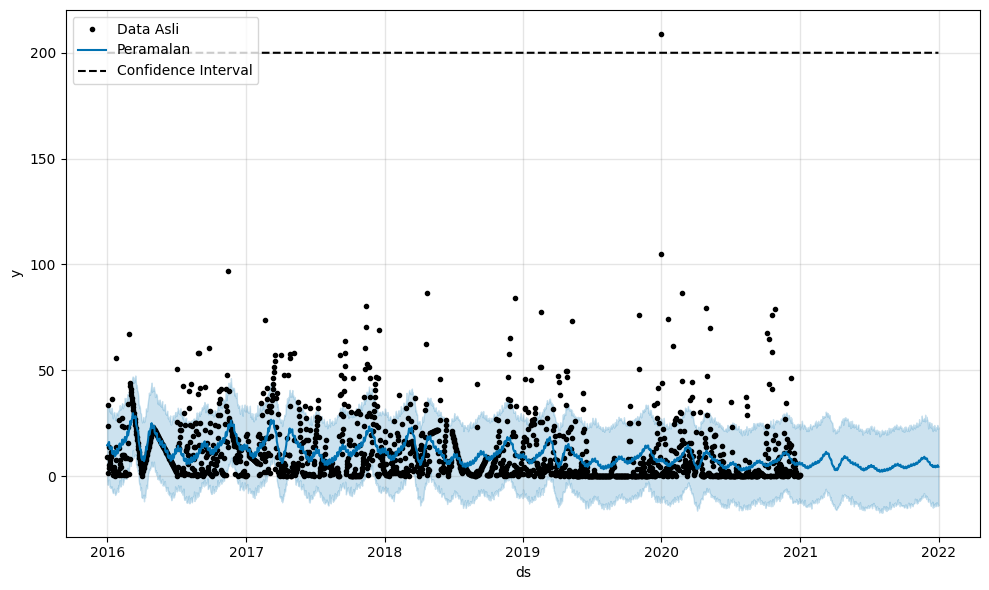

In [224]:
model_RR2.plot(forecast2, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [225]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [226]:
triple_metric(forecast2, 'RR')

Mean Absolute Error :  8.516174921465419
Mean Squared Error :  203.5111059256271
Mean Absolute Percentage Error :  1.2807256690087243


In [227]:
predict_res_rr2 = forecast2['yhat'][len(forecast)-720:-355]

In [164]:
predict_res_rr2 = predict_res_rr2.to_frame(name='RR')

In [165]:
pred_res_2020_tuning = pd.concat([predict_res_t, predict_res_rh, predict_res_ss, predict_res_ddd, predict_res_ff, predict_res_rr2], axis=1)


In [166]:
pred_res_2020_tuning['region_name_Jakarta Selatan'] = 1
pred_res_2020_tuning['region_name_Jakarta Timur'] = 0
pred_res_2020_tuning['region_name_Jakarta Utara'] = 0

In [167]:
def convert_radian_to_degree(radian):
    return radian * (180 / np.pi)

pred_res_2020_tuning['ddd_x'] = pred_res_2020_tuning['ddd_x'].apply(convert_radian_to_degree)

In [168]:
flood_predict2 = rf_model.predict(pred_res_2020_tuning)

In [169]:
flood_predict2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [170]:
sum2 = np.sum(flood_predict2 == 1)
sum2

34

## Perhitungkan MAPE

Selanjutnya kita akan mencoba dengan memperhitungkan MAPE

In [263]:
import random
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_percentage_error

params_grid = {
    'seasonality_mode': ('multiplicative', 'additive'),
    'changepoint_prior_scale': [0.1, 0.2, 0.3, 0.4, 0.5],
    'n_changepoints': [100, 150, 200]
}

grid = ParameterGrid(params_grid)

best_mape = float('inf')  # Inisialisasi nilai MAPE terbaik dengan nilai tak terhingga

for p in grid:
    print(p)
    random.seed(0)
    train_model = Prophet(
        changepoint_prior_scale=p['changepoint_prior_scale'],
        n_changepoints=p['n_changepoints'],
        seasonality_mode=p['seasonality_mode'],
        weekly_seasonality=True,
        daily_seasonality=True,
        yearly_seasonality=True,
        interval_width=0.95
    )
    
    future = stasiun1[['date', 'RR']].copy()
    future.columns = ['ds', 'y']
    train_model.fit(future)
    
    future_forecast = train_model.make_future_dataframe(periods=365)
    forecast = train_model.predict(future_forecast)
    
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun1['RR'][len(stasiun1)-365:])
    
    if mape < best_mape:
        best_mape = mape
        best_parameters = p

print("Best Parameters:", best_parameters)
print("Best MAPE:", best_mape)


16:08:19 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


16:08:19 - cmdstanpy - INFO - Chain [1] done processing
16:08:19 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


16:08:19 - cmdstanpy - INFO - Chain [1] done processing
16:08:20 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


16:08:20 - cmdstanpy - INFO - Chain [1] done processing
16:08:20 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


16:08:21 - cmdstanpy - INFO - Chain [1] done processing
16:08:21 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


16:08:21 - cmdstanpy - INFO - Chain [1] done processing
16:08:22 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.1, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


16:08:22 - cmdstanpy - INFO - Chain [1] done processing
16:08:22 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


16:08:26 - cmdstanpy - INFO - Chain [1] done processing
16:08:26 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


16:08:26 - cmdstanpy - INFO - Chain [1] done processing
16:08:27 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


16:08:31 - cmdstanpy - INFO - Chain [1] done processing
16:08:31 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


16:08:31 - cmdstanpy - INFO - Chain [1] done processing
16:08:32 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


16:08:36 - cmdstanpy - INFO - Chain [1] done processing
16:08:36 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.2, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


16:08:37 - cmdstanpy - INFO - Chain [1] done processing
16:08:37 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


16:08:40 - cmdstanpy - INFO - Chain [1] done processing
16:08:41 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


16:08:41 - cmdstanpy - INFO - Chain [1] done processing
16:08:41 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


16:08:45 - cmdstanpy - INFO - Chain [1] done processing
16:08:45 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


16:08:46 - cmdstanpy - INFO - Chain [1] done processing
16:08:46 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


16:08:50 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.3, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


16:08:51 - cmdstanpy - INFO - Chain [1] start processing
16:08:52 - cmdstanpy - INFO - Chain [1] done processing
16:08:53 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


16:08:55 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


16:08:56 - cmdstanpy - INFO - Chain [1] start processing
16:08:57 - cmdstanpy - INFO - Chain [1] done processing
16:08:57 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


16:09:01 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


16:09:01 - cmdstanpy - INFO - Chain [1] start processing
16:09:02 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


16:09:03 - cmdstanpy - INFO - Chain [1] start processing
16:09:09 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.4, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


16:09:10 - cmdstanpy - INFO - Chain [1] start processing
16:09:11 - cmdstanpy - INFO - Chain [1] done processing
16:09:11 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'multiplicative'}


16:09:13 - cmdstanpy - INFO - Chain [1] done processing
16:09:13 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 100, 'seasonality_mode': 'additive'}


16:09:14 - cmdstanpy - INFO - Chain [1] done processing
16:09:14 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}


16:09:17 - cmdstanpy - INFO - Chain [1] done processing
16:09:17 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 150, 'seasonality_mode': 'additive'}


16:09:18 - cmdstanpy - INFO - Chain [1] done processing
16:09:18 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'multiplicative'}


16:09:22 - cmdstanpy - INFO - Chain [1] done processing
16:09:22 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.5, 'n_changepoints': 200, 'seasonality_mode': 'additive'}


16:09:23 - cmdstanpy - INFO - Chain [1] done processing


Best Parameters: {'changepoint_prior_scale': 0.2, 'n_changepoints': 150, 'seasonality_mode': 'multiplicative'}
Best MAPE: 1.2110255045279368


Best Parameters: {'changepoint_prior_scale': 0.1, 'growth': 'logistic', 'n_changepoints': 150, 'seasonality_mode': 'additive'}
Ini mape dengan logistic tapi untuk prediksi banjir turun dan kalau di metric jadi beda

In [265]:
def get_model3(data, column):
    df_train = data[['date', column]].copy()
    df_train.rename(columns={'date': 'ds', column: 'y'}, inplace=True)
    
    # Tambahkan kolom 'cap' dengan nilai kapasitas
    my_model = Prophet(changepoint_prior_scale=0.2, 
                       n_changepoints=150, 
                       seasonality_mode='multiplicative'
                       )  
    my_model.fit(df_train)
    
    return my_model

In [266]:
model_RR3 =  get_model3(stasiun1, 'RR')

16:09:40 - cmdstanpy - INFO - Chain [1] start processing


16:09:40 - cmdstanpy - INFO - Chain [1] done processing


In [267]:
future_dates3 = model_RR3.make_future_dataframe(periods=365, freq='D')
future_dates3.shape[0]


2192

In [268]:
forecast3 = model_RR3.predict(future_dates3)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,12.935743,-4.036541,31.061857
1,2016-01-02,12.945914,-5.062386,30.200174
2,2016-01-03,13.285354,-4.763290,32.299917
3,2016-01-04,13.156661,-4.939931,30.633486
4,2016-01-05,14.426878,-3.995349,33.959545


c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\thebl\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


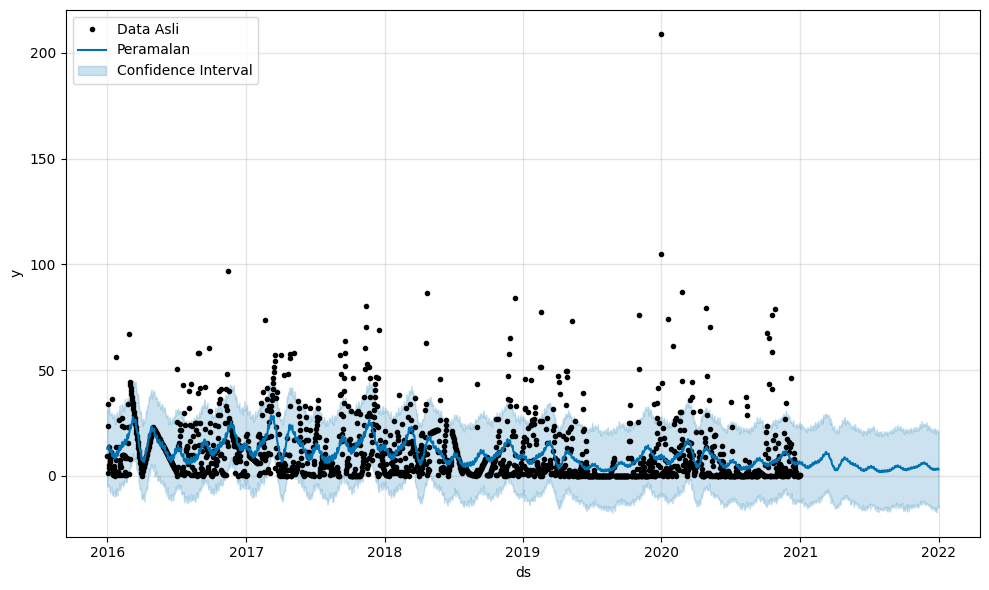

In [269]:
model_RR3.plot(forecast3, uncertainty=True)
plt.legend(['Data Asli', 'Peramalan', 'Confidence Interval'], loc='upper left')

In [270]:
def triple_metric(forecast, column):
    mae = mean_absolute_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Error : ',mae)
    mse = mean_squared_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Squared Error : ',mse)
    mape = mean_absolute_percentage_error(forecast['yhat'][len(forecast)-720:-355], stasiun1[column][len(stasiun1)-365:])
    print('Mean Absolute Percentage Error : ',mape)

In [271]:
triple_metric(forecast3, 'RR')

Mean Absolute Error :  8.79312538050173
Mean Squared Error :  202.4304149492095
Mean Absolute Percentage Error :  1.2114444201694337


In [272]:
predict_res_rr3 = forecast3['yhat'][len(forecast)-720:-355]

In [273]:
predict_res_rr3 = predict_res_rr3.to_frame(name='RR')

In [274]:
pred_res_2020_tuning2 = pd.concat([predict_res_t, predict_res_rh, predict_res_ss, predict_res_ddd, predict_res_ff, predict_res_rr3], axis=1)

In [275]:
pred_res_2020_tuning2['region_name_Jakarta Selatan'] = 1
pred_res_2020_tuning2['region_name_Jakarta Timur'] = 0
pred_res_2020_tuning2['region_name_Jakarta Utara'] = 0

In [276]:
def convert_radian_to_degree(radian):
    return radian * (180 / np.pi)

pred_res_2020_tuning2['ddd_x'] = pred_res_2020_tuning2['ddd_x'].apply(convert_radian_to_degree)

In [277]:
flood_predict3 = rf_model.predict(pred_res_2020_tuning2)
flood_predict3

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [278]:
sum3 = np.sum(flood_predict3 == 1)
sum3

45